In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex1data1.txt'
data = pd.read_csv(data_path, header=None, names=['Population', 'Profit'])

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 数据可视化

<AxesSubplot:xlabel='Population', ylabel='Profit'>

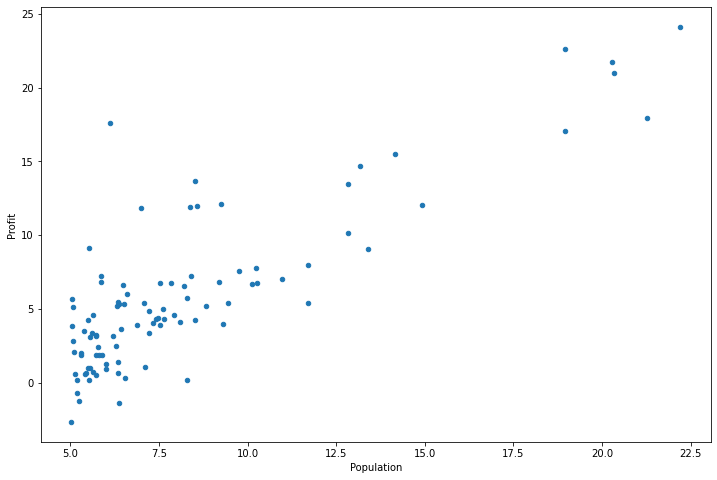

In [8]:
# fig = plt.figure(figsize=(12,8))
# plt.scatter(data['Population'], data['Profit'])
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [9]:
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T) - y), 2)
    return np.sum(inner)/(2*len(X))

In [10]:
data.insert(0, 'Ones', 1)

In [11]:
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [12]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:, cols-1:cols]

In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
computeCost(X, y, theta)

32.072733877455676

In [16]:
theta.ravel().shape[1]

2

# 2.batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [20]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) # ravel()将数组拉成一维
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        for j in range(parameters):
            term =  np.multiply(error, X[:,j]) #计算两矩阵(hθ(x)-y)x
            temp[0, j] = theta[0, j] - ((alpha/len(X)) * np.sum(term))
        theta =temp
        cost[i] = computeCost(X, y , theta)
    
    return theta, cost

In [21]:
alpha = 0.01
iters = 1000

In [22]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

2


matrix([[-3.24140214,  1.1272942 ]])

In [127]:
computeCost(X, y, g)

4.515955503078912

### 绘制线性模型和数据，并画出拟合曲线

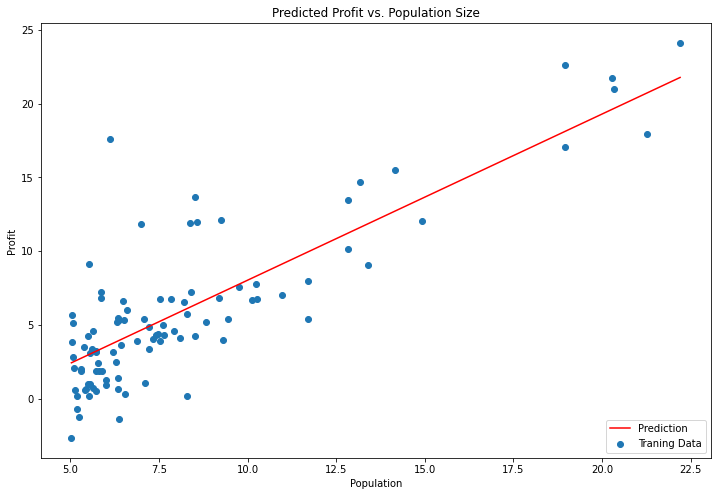

In [23]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)#抽100个样本
f = g[0, 0] + g[0 ,1] * x

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=4)#显示标签位置
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

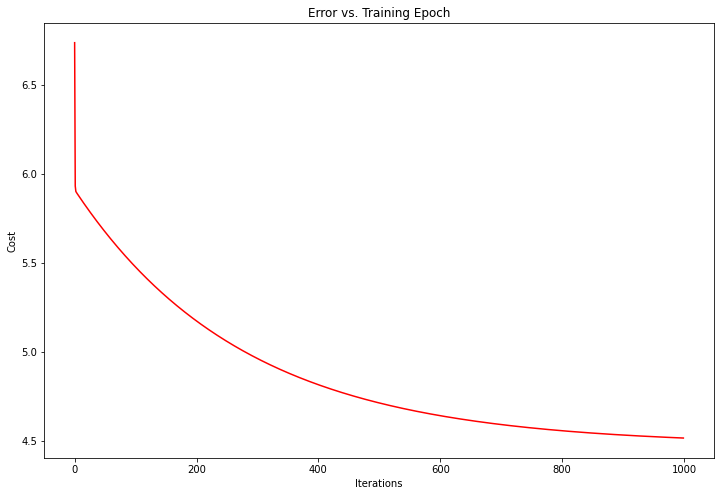

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 多变量线性回归

In [25]:
data_path = 'data/ex1data2.txt'

In [26]:
data2 = pd.read_csv(data_path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 特征归一化

In [27]:
data2 = (data2 - data2.mean()) / data2.std()

In [28]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [29]:
data2.insert(0, 'Ones', 1)

In [30]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

3


0.13070336960771892

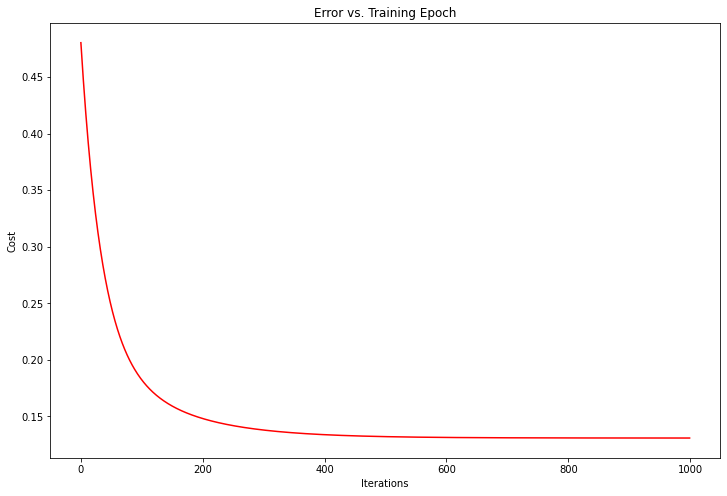

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 正规方程

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [32]:
def normalEqn(X, y):
    theta = np.linalg.pinv(X.T@X) @ X.T @ y
    return theta

In [33]:
final_theta2=normalEqn(X, y)

In [34]:
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])